In [1]:
from src.helpers.experiment import create_tsfresh_dataframe
from src.helpers.diabetes.cega import clarke_error_grid
from src.helpers.diabetes.madex import mean_adjusted_exponent_error
from pycaret.regression import setup, create_model, compare_models, predict_model
from loguru import logger
import warnings
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas

In [2]:
train_parameters = {
    'ohio_no': 563,
    'scope': 'train',
    'train_ds_size': 0,
    'window_size': 12,
    'prediction_horizon': 1,
    'minimal_features': False,
}

unseen_data_parameters = {
    'ohio_no': 563,
    'scope': 'test',
    'train_ds_size': 0,
    'window_size': 12,
    'prediction_horizon': 1,
    'minimal_features': False,
}

# output = run_experiment(parameters, test_parameters)

2021-07-03 10:21:26.572 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/563_train_0_12_1.pkl
2021-07-03 10:21:26.716 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 563, 'scope': 'train', 'train_ds_size': 0, 'window_size': 12, 'prediction_horizon': 1, 'minimal_features': False}


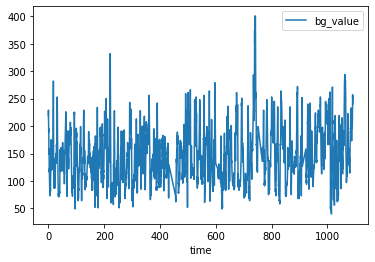

2021-07-03 10:21:27.064 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-07-03 10:21:27.065 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/563_train_0_12_1.pkl


In [3]:
source_df = create_tsfresh_dataframe(train_parameters)
clean_df = source_df.drop(
    columns=['start', 'end', 'start_time', 'end_time'])

In [4]:
regressor = setup(clean_df,
    target='label',
    feature_selection=True,
    html=True,
    silent=True,
    session_id=1974
    )

,Description,Value
0,session_id,1974
1,Target,label
2,Original Data,"(12112, 788)"
3,Missing Values,True
4,Numeric Features,338
5,Categorical Features,449
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(8478, 295)"


In [5]:
best3 = compare_models(
    exclude=['catboost', 'xgboost'],
    sort='RMSE',
    n_select=3,
    verbose=True
)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,2.4577,23.2671,4.5970,0.9905,0.0333,0.0182,0.2820
omp,Orthogonal Matching Pursuit,2.4222,24.4261,4.6867,0.9900,0.0341,0.0178,0.0420
en,Elastic Net,2.4155,24.9319,4.7353,0.9898,0.0336,0.0178,0.2950
br,Bayesian Ridge,2.3690,27.9284,4.8980,0.9885,0.0341,0.0173,0.1460
lightgbm,Light Gradient Boosting Machine,2.9139,27.3851,5.0274,0.9888,0.0381,0.0217,0.9020
et,Extra Trees Regressor,2.9978,30.0792,5.3097,0.9877,0.0398,0.0222,9.6400
gbr,Gradient Boosting Regressor,3.2878,33.4661,5.5905,0.9863,0.0430,0.0246,7.7660
rf,Random Forest Regressor,3.3185,37.2306,5.9304,0.9847,0.0449,0.0247,18.1400
dt,Decision Tree Regressor,5.1566,82.5622,8.9394,0.9661,0.0674,0.0388,0.3970
ada,AdaBoost Regressor,6.8389,87.6376,9.3321,0.9641,0.0754,0.0535,3.3830


In [6]:
best3

[Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=1974,
       selection='cyclic', tol=0.0001, warm_start=False),
 OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                           normalize=True, precompute='auto', tol=None),
 ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
            max_iter=1000, normalize=False, positive=False, precompute=False,
            random_state=1974, selection='cyclic', tol=0.0001, warm_start=False)]

In [7]:
master_output = {}

In [8]:
def run_model(model_to_run):
    output = {}
    model = create_model(model_to_run)
    model_name = model.__str__().split('(')[0]
    logger.info(f'Processing model: {model_name}')
    output['model'] = model
    output['model_name'] = model_name
    pd = predict_model(model)
    (_, res) = clarke_error_grid(pd['label'], pd['Label'], 'Test')
    output['internal_cga_analysis'] = res
    rmse = np.sqrt(mean_squared_error(pd['label'], pd['Label']))
    rmadex = np.sqrt(mean_adjusted_exponent_error(
        pd['label'], pd['Label']))
    output['internal_rmse'] = rmse
    output['internal_rmadex'] = rmadex

    unseen_df = create_tsfresh_dataframe(unseen_data_parameters)
    clean_unseen_df = unseen_df.drop(
        columns=['start', 'end', 'start_time', 'end_time'])
    unseen_pd = predict_model(model, data=clean_unseen_df)
    (_, res) = clarke_error_grid(unseen_pd['label'], unseen_pd['Label'], 'Test')
    output['unseen_cga_analysis'] = res
    rmse = np.sqrt(mean_squared_error(unseen_pd['label'], unseen_pd['Label']))
    rmadex = np.sqrt(mean_adjusted_exponent_error(
        unseen_pd['label'], unseen_pd['Label']))
    output['unseen_rmse'] = rmse
    output['unseen_rmadex'] = rmadex
    logger.info(output)
    master_output[model_name] = output
    # df_array.append()
    

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.6368,73.7135,8.5857,0.9697,0.0679,0.0189
1,2.4540,14.4320,3.7989,0.9946,0.0264,0.0180
2,2.4539,15.3705,3.9205,0.9937,0.0296,0.0189
3,2.5306,20.7894,4.5595,0.9915,0.0370,0.0196
4,2.3429,12.1101,3.4800,0.9953,0.0251,0.0173
5,2.4956,23.2357,4.8203,0.9904,0.0334,0.0186
6,2.4097,16.4335,4.0538,0.9931,0.0309,0.0180
7,2.3684,11.9748,3.4605,0.9949,0.0272,0.0181
8,2.3061,14.3995,3.7947,0.9937,0.0248,0.0164
9,2.5789,30.2120,5.4965,0.9876,0.0309,0.0184


2021-07-03 10:29:03.272 | INFO     | __main__:run_model:5 - Processing model: Lasso


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,2.3800,15.0683,3.8818,0.9940,0.0308,0.0180


2021-07-03 10:29:03.620 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/563_test_0_12_1.pkl
2021-07-03 10:29:03.660 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 563, 'scope': 'test', 'train_ds_size': 0, 'window_size': 12, 'prediction_horizon': 1, 'minimal_features': False}


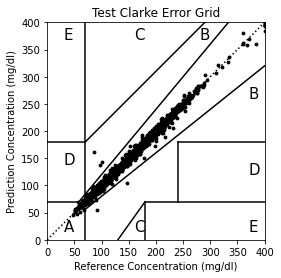

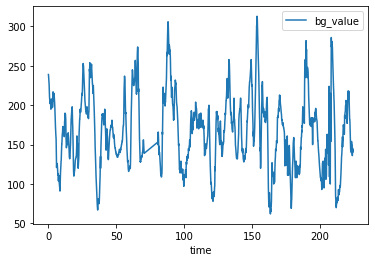

2021-07-03 10:29:03.937 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-07-03 10:29:03.938 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/563_test_0_12_1.pkl
2021-07-03 10:29:05.076 | INFO     | __main__:run_model:28 - {'model': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=1974,
      selection='cyclic', tol=0.0001, warm_start=False), 'model_name': 'Lasso', 'internal_cga_analysis': [3629, 5, 0, 0, 0], 'internal_rmse': 3.8817935, 'internal_rmadex': 5.2437971262106275, 'unseen_cga_analysis': [2548, 10, 0, 0, 0], 'unseen_rmse': 5.353483548518137, 'unseen_rmadex': 10.289890548942097}


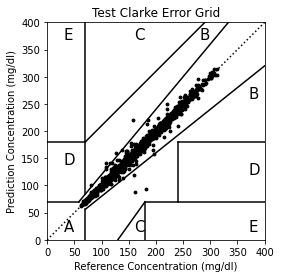

In [9]:
run_model(best3[0])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.6188,75.7197,8.7017,0.9689,0.0713,0.0188
1,2.3025,11.8030,3.4356,0.9956,0.0256,0.0170
2,2.3160,14.6796,3.8314,0.9939,0.0282,0.0174
3,2.5672,22.4134,4.7343,0.9908,0.0374,0.0195
4,2.2382,11.1601,3.3407,0.9957,0.0241,0.0163
5,2.5010,23.2928,4.8263,0.9904,0.0331,0.0183
6,2.4248,19.0887,4.3691,0.9920,0.0370,0.0180
7,2.3306,11.6221,3.4091,0.9951,0.0257,0.0173
8,2.3291,16.3588,4.0446,0.9929,0.0260,0.0166
9,2.5934,38.1223,6.1743,0.9843,0.0324,0.0184


2021-07-03 10:29:05.916 | INFO     | __main__:run_model:5 - Processing model: OrthogonalMatchingPursuit


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,2.3189,15.2697,3.9076,0.9939,0.0319,0.0175


2021-07-03 10:29:06.207 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/563_test_0_12_1.pkl
2021-07-03 10:29:06.226 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 563, 'scope': 'test', 'train_ds_size': 0, 'window_size': 12, 'prediction_horizon': 1, 'minimal_features': False}


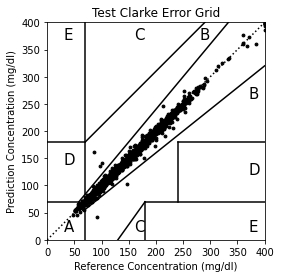

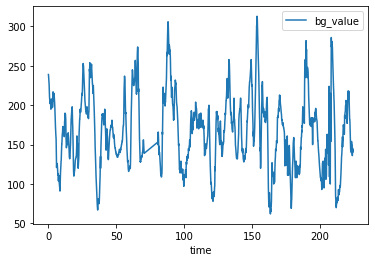

2021-07-03 10:29:06.477 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-07-03 10:29:06.478 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/563_test_0_12_1.pkl
2021-07-03 10:29:07.546 | INFO     | __main__:run_model:28 - {'model': OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None), 'model_name': 'OrthogonalMatchingPursuit', 'internal_cga_analysis': [3629, 5, 0, 0, 0], 'internal_rmse': 3.90764175250102, 'internal_rmadex': 5.190296231764937, 'unseen_cga_analysis': [2549, 9, 0, 0, 0], 'unseen_rmse': 5.288034092362065, 'unseen_rmadex': 9.972422540148228}


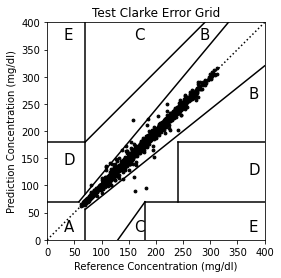

In [10]:
run_model(best3[1])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.5743,73.7342,8.5869,0.9697,0.0682,0.0183
1,2.4204,14.9629,3.8682,0.9945,0.0262,0.0176
2,2.3911,14.9424,3.8655,0.9938,0.0289,0.0183
3,2.4754,20.3655,4.5128,0.9916,0.0366,0.0191
4,2.2799,11.6754,3.4169,0.9955,0.0247,0.0167
5,2.4429,22.6526,4.7595,0.9907,0.0327,0.0182
6,2.4012,18.1735,4.2630,0.9924,0.0345,0.0179
7,2.3026,11.4073,3.3775,0.9952,0.0262,0.0174
8,2.2680,15.3283,3.9151,0.9933,0.0253,0.0161
9,2.5995,46.0771,6.7880,0.9810,0.0324,0.0183


2021-07-03 10:29:11.345 | INFO     | __main__:run_model:5 - Processing model: ElasticNet


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,2.3273,14.7646,3.8425,0.9941,0.0308,0.0176


2021-07-03 10:29:11.678 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/563_test_0_12_1.pkl
2021-07-03 10:29:11.697 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 563, 'scope': 'test', 'train_ds_size': 0, 'window_size': 12, 'prediction_horizon': 1, 'minimal_features': False}


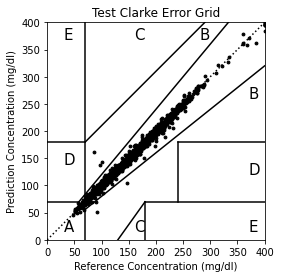

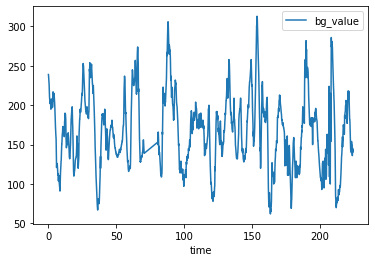

2021-07-03 10:29:11.948 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-07-03 10:29:11.948 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/563_test_0_12_1.pkl
2021-07-03 10:29:13.043 | INFO     | __main__:run_model:28 - {'model': ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=1974, selection='cyclic', tol=0.0001, warm_start=False), 'model_name': 'ElasticNet', 'internal_cga_analysis': [3628, 6, 0, 0, 0], 'internal_rmse': 3.8424668, 'internal_rmadex': 5.193850596366663, 'unseen_cga_analysis': [2547, 11, 0, 0, 0], 'unseen_rmse': 5.299151168498394, 'unseen_rmadex': 10.113508720698364}


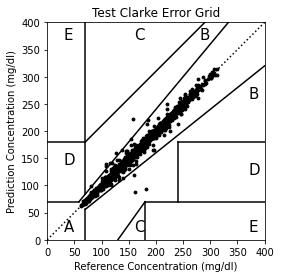

In [11]:
run_model(best3[2])

In [12]:
print(master_output)

{'Lasso': {'model': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=1974,
      selection='cyclic', tol=0.0001, warm_start=False), 'model_name': 'Lasso', 'internal_cga_analysis': [3629, 5, 0, 0, 0], 'internal_rmse': 3.8817935, 'internal_rmadex': 5.2437971262106275, 'unseen_cga_analysis': [2548, 10, 0, 0, 0], 'unseen_rmse': 5.353483548518137, 'unseen_rmadex': 10.289890548942097}, 'OrthogonalMatchingPursuit': {'model': OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None), 'model_name': 'OrthogonalMatchingPursuit', 'internal_cga_analysis': [3629, 5, 0, 0, 0], 'internal_rmse': 3.90764175250102, 'internal_rmadex': 5.190296231764937, 'unseen_cga_analysis': [2549, 9, 0, 0, 0], 'unseen_rmse': 5.288034092362065, 'unseen_rmadex': 9.972422540148228}, 'ElasticNet': {'model': ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True

In [13]:
pandas.DataFrame.from_dict(master_output, orient='index')

,model,model_name,internal_cga_analysis,internal_rmse,internal_rmadex,unseen_cga_analysis,unseen_rmse,unseen_rmadex
Lasso,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",Lasso,"[3629, 5, 0, 0, 0]",3.881793,5.243797,"[2548, 10, 0, 0, 0]",5.353484,10.289891
OrthogonalMatchingPursuit,"OrthogonalMatchingPursuit(fit_intercept=True, ...",OrthogonalMatchingPursuit,"[3629, 5, 0, 0, 0]",3.907642,5.190296,"[2549, 9, 0, 0, 0]",5.288034,9.972423
ElasticNet,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",ElasticNet,"[3628, 6, 0, 0, 0]",3.842467,5.193851,"[2547, 11, 0, 0, 0]",5.299151,10.113509


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d560f233-0034-499f-bc4e-7ada8795cb9f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>